# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### План работы:
1. Изучить информацию о входных данных: просмотреть информацию о содержании таблицы. Наметить, какие данные требуют корректировки.
2. Выявить и обработать пропуски.
3. Заменить тип данных.
4. Провести исследовательский анализ данных. Изучить площадь квартир, цену, высоту потолков, время продажи квартиры. Построить гистограммы, посчитать средние значения и медиану. Рассчитать коэфициент корреляции.
5. Убрать редкие и выбивающиеся значения.
6. Изучить, какие факторы больше всего влияют на стоимость квартиры (квадратный метр, число комнат, этаж, удаленность от центра, день, месяц и год размещения объявления).
7. Выбрать топ-10 населенных пунктов с наибольшим числом объявлений. Посчитать цену квадратного метра в них, выделить населенные пункты с самой высокой и низкой стоимостью жилья. 
8. Выделить квартиры в Санкт-Петербурге. Выяснить, какая область входит в центр. Посчитать цену для каждого километра от центра. 
9. Выделить сегмент квартир в центре. Проанализировать площадь, цену, число комнат, высоту потолков, этаж, уделенность от центра, дату размещения объявления. Выяснить, какие их этих факторов влияют на цену. Сравнить с общими результатами по городу.
10. Сформулировать общие выводы по исследованию.

### Шаг 1. Открываем файл с данными и изучаем общую информацию. 

In [34]:
import pandas as pd #импортируем библиотеки
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
#прочитаем файл, присвоим таблице имя, установим разделитель колонок
realty = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t') 
realty.to_csv('realty')

In [36]:
realty.info() #посмотрим общую информацию о таблице
realty.head(10) #выведем первые 10 строк

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,nan,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,nan
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,nan,0.00,nan,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,...,nan,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,nan,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,nan,12.00,14.40,5,NaN,...,9.10,nan,городской посёлок Янино-1,nan,nan,nan,nan,nan,nan,55.00
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,nan,26.00,10.60,6,NaN,...,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,nan,0.00,nan,155.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,nan,24.00,nan,22,NaN,...,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,nan,0.00,nan,nan
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,nan,27.00,15.43,26,NaN,...,8.81,nan,посёлок Мурино,nan,nan,nan,nan,nan,nan,189.00
9,18,5400000.00,61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,...,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,nan,0.00,nan,289.00


### Вывод

Таблица содержит столбцы:

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

В результате первичного просмотра информации видно, что в столбцах balcony, parks_nearest, ponds_nearest, days_exposition, is_apartment, kitchen_area, living_area и в других есть пропущенные значения. Некоторые из них потребуется заменить.  
Столбцы floors_total, last_price, kitchen_area, living_area, parks_around3000, ponds_nearest, ponds_around3000, total_area, ceiling_height содержат тип данных float. 

Вероятно, большинство из этих значений были пропущены по причине невнимательности или неосведомленности заполняющих. Например, больше всего пропусков - в столбце "апартаменты". Скорее всего, многие просто не знают, что это такое и чем апартаменты отличаются от квартиры. Возможно, не считали нужным заполнять такие параметры, как количество этажей, прощадь кухни, высота пололков и др. Пропуски в названии населенного пункта могли образоваться случайно при загрузке информации.

### Шаг 2. Предобработка данных

In [37]:
realty.isnull().sum() #ищем пропуски

#заменяем данные о количестве балконов нулями
realty['balcony'] = realty['balcony'].fillna(value='0')

realty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null object
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

Пропуски обнаружены методами isnull() и sum() в 14 столбцах: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_neares, days_exposition.  

Нужно заполнить пропуски в следующих столбцах (которые потребуются для дальнейшего исследования): высота потолков, количество этажей, расстояние до центра, количество дней размещения.   
Пропуски в названии населенных пунктов лучше удалить, т.к.их мало и на результат они не повлияют.   
Пропуски в столбцах с данными о количестве балконов: их можно заполнить нулями, так как, скорее всего, балконов в соответствующих квартирах действительно нет.  

Оставим и тип float в соответствующих столбцах, поскольку при расчете таких данных, как высота потолков, расстояние, цена и прочие точные параметры, цифры после запятой могут оказаться важными.

In [38]:
#заполним пропуски медианой для высоты потолков
realty['ceiling_height'].median()
realty['ceiling_height'] = realty['ceiling_height'].fillna(2.65)

#для количества этажей
realty['floors_total'].median()
realty['floors_total'] = realty['floors_total'].fillna(9)

#для расстояния до центра
realty['cityCenters_nearest'].median()
realty['cityCenters_nearest'] = realty['cityCenters_nearest'].fillna(13098.5)

#для дней размещения
realty['days_exposition'].median()
realty['days_exposition'] = realty['days_exposition'].fillna(95)

#удаляем пропуски в столбце с названием населенного пункта
realty.dropna(subset = ['locality_name'], inplace = True)

Заполним пропуски медианой для высоты потолков, количества этажей, расстояния до центра, дней размещения.  
Удаляем пропуски в столбце с названием населенного пункта методом dropna().

### Шаг 3. Дополняем таблицу

In [39]:
#вычислим цену квадратного метра и добавим столбец в таблицу
realty['square_meter_price'] = realty['last_price'] / realty['total_area']

#определим и добавим в таблицу год, месяц и день недели публикации объявления
realty['year'] = pd.DatetimeIndex(realty['first_day_exposition']).year
realty['month'] = pd.DatetimeIndex(realty['first_day_exposition']).month
realty['weekday'] = pd.DatetimeIndex(realty['first_day_exposition']).weekday

#отфильтруем квартиры, находящиеся на первом, последнем и других этажах с помощью цикла
def type_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floors_total == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'

#добавим результаты в таблицу
realty['type_floor'] = realty.apply(type_floor, axis = 1)

#посмотрим и добавим в таблицу соотношение жилой и общей площади
realty['living_total_area_ratio'] = realty['living_area'] / realty['total_area']

#и добавим в таблицу отношение площади кухни к общей
realty['kitchen_total_area_ratio'] = realty['kitchen_area'] / realty['total_area']

Для вычисления цены квадратного метра разделим цену квартиры на общую площадь.  

С помощью модуля DatetimeIndex определим год, месяц и день недели публикации объявления, оформим их в отдельные столбцы.

Отфильтруем этажи по принципу: первый, последний, другой с помощью цикла, добавим результат в таблицу.

Добавим в таблицу соотношение жилой и общей площади, отношение площади кухни к общей.

### Шаг 4. Исследовательский анализ данных

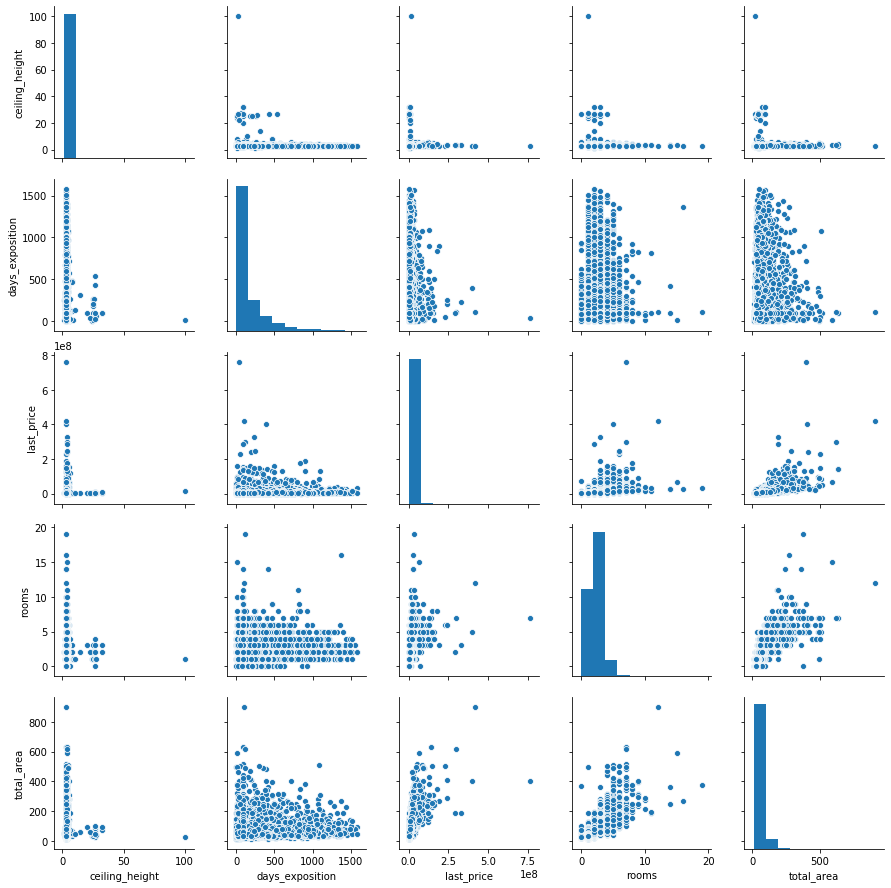

In [40]:
#создадим столбец с уникальным идентификатором объявления, соответствующий номеру строки
realty['id'] = realty.reset_index().index

#построим графики для следующих параметров:
#дни размещения, высота потолков, площадь квартир, цена, количество комнат
realty_hist_multi = (realty.pivot_table(index='id', values=['days_exposition', 
                            'ceiling_height', 'total_area', 'last_price', 'rooms'], aggfunc='mean')
)
sns.pairplot(realty_hist_multi)

Построим графики seaborn для интересующих параметров, рассмотрим каждый подробно.

На гистограмме для площади квартир видим, что наибольшее количество из них имеет площадь от 30 до 60 кв.м, но есть квартиры и площадью более 100 кв.м, хотя таких мало. Отдельные данные имеются на значениях почти 400 кв.м, но они слишком немногочисленны.

На гистограмме по числу комнат видно, что большинство квартир одно- и двухкомнатные. Чуть меньше трехкомнатных, далее - по убыванию - до 8 комнат. Эти данные выглядят правдоподобно (за исключением небольшого количества значений на отметке 0, что означает, вероятно, свободную планировку). 

На гистограмме по высоте потолков видим, что многие квартиры имеют потолки от 2,5 до 3 м, что весьма типично. Есть выбивающиеся значения - вплоть до 4,5 метров. Cудя по полученной информации по нижнему и верхнему квартилям, высота потолков обычно колеблется от 1,68 до 3,22м, а наиболее типичное значение - 2,65м.

Гистограмма с количеством дней размещения показывает, что присутствует слишком много околонулевых значений.

In [41]:
#выведем информацию методом describe()
pd.options.display.float_format = '{:.0f}'.format
realty.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,airports_nearest,...,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,year,month,weekday,living_total_area_ratio,kitchen_total_area_ratio,id
count,23650,23650,23650,23650,23650,23650,21752,23650,21381,18116,...,18140,9085,23650,23650,23650,23650,23650,21752,21381,23650
mean,10,6541127,60,2,3,11,34,6,11,28803,...,1,518,169,99432,2017,6,3,1,0,11824
std,6,10896399,36,1,1,7,22,5,6,12637,...,1,278,207,50338,1,3,2,0,0,6827
min,0,12190,12,0,1,1,2,1,1,0,...,0,13,1,112,2014,1,0,0,0,0
25%,6,3400000,40,1,3,5,19,2,7,18576,...,0,293,45,76615,2017,3,1,0,0,5912
50%,9,4650000,52,2,3,9,30,4,9,26756,...,1,502,95,95000,2017,6,3,1,0,11824
75%,14,6799000,70,3,3,16,42,8,12,37294,...,1,730,198,114274,2018,10,4,1,0,17737
max,50,763000000,900,19,100,60,410,33,112,84869,...,3,1344,1580,1907500,2019,12,6,1,1,23649


(15000000, 0)

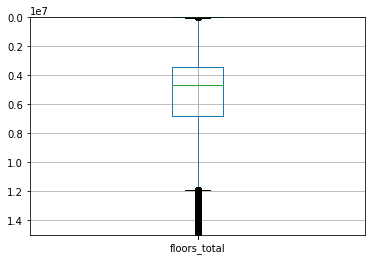

In [42]:
#постороим bоxplot для значений цены
boxplot = realty.boxplot(column = ['last_price'])
plt.ylim(15000000,0)

#для высоты потолков
boxplot = realty.boxplot(column = ['ceiling_height'])
plt.ylim(15000000,0)

#для времени продажи
boxplot = realty.boxplot(column = ['days_exposition'])
plt.ylim(15000000,0)

#и количества этажей
boxplot = realty.boxplot(column = ['floors_total'])
plt.ylim(15000000,0)

Посмотрим средние и медианные значения столбцов, содержащих информацию о цене,  высоте потолков, времени продажи, количестве этажей и расстоянии до центра.

Цена квартиры обычно колеблется от 3,4 млн до 6,79 млн. Медианное значение 4,65 млн. Верхнюю границу следует продлить до значения, равного 1,5 межквартильным размахам, т.е.до 11,87 млн, остальное нужно отфильтровать.

Медиана для высоты потолков составляет 2,65м, а в основном высота колеблется от 2,6 м до 3 м. Максимальный порог - 3,6 м, остальные значения можно отсечь.

Поскольку среднее время продажи почти вдвое больше медианы (95 дней), значит - есть выбивающиеся значения. Cудя по полученной информации по нижнему и верхнему квартилям, продажа квартиры обычно занимает от 45 до 198 дней. Квартиры, которые проданы быстрее, чем за 45 дней - проданы быстро, а дольше, чем за 198 - уже долго. Однако, верхнюю границу следует продлить до значения, равного 1,5 межквартильным размахам, т.е.до 427 дней.

Количество этажей чаще всего равно 9, верхний квартиль соответствует 16, нижний - 5. Среднее и медиана различаются несущественно, значит, значения не содержат многочисленных выбросов, но для большей точности всё же лучше отфильтровать их.

In [43]:
#создадим выборку, исключив слишком дорогие значения цены
filtered_price = realty.query('last_price <= 11870000')

#и слишком высокие потолки
filtered_ceiling_height = realty.query('ceiling_height <= 3.6')

#уберем выбивающиеся значения по времени
filtered_days_exposition = realty.query('days_exposition <= 427')

#и по количеству этажей
filtered_floors_total = realty.query('floors_total <= 40')

Отфильтруем выбивающиеся значения в столбцах last_price, ceiling_height, days_exposition и floors_total метдом query().

In [44]:
#посмотрим коэффициенты корреляции значений в таблице
pd.options.display.float_format = '{:.2f}'.format
realty.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,...,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,year,month,weekday,living_total_area_ratio,kitchen_total_area_ratio,id
total_images,1.00,0.10,0.12,0.10,0.00,0.01,0.10,0.03,-0.03,-0.02,...,-0.01,-0.00,-0.04,0.13,0.14,0.00,-0.01,0.00,-0.03,0.00
last_price,0.10,1.00,0.65,0.36,0.06,-0.01,0.57,0.03,-0.03,-0.01,...,0.16,-0.09,0.07,0.74,-0.04,0.00,0.00,0.00,-0.09,-0.00
total_area,0.12,0.65,1.00,0.76,0.08,-0.08,0.94,-0.02,-0.07,-0.03,...,0.16,-0.10,0.12,0.30,-0.08,0.00,-0.00,0.14,-0.32,-0.01
rooms,0.10,0.36,0.76,1.00,0.05,-0.23,0.85,-0.15,-0.15,-0.09,...,0.09,-0.06,0.10,0.06,-0.05,-0.00,-0.00,0.48,-0.59,-0.01
ceiling_height,0.00,0.06,0.08,0.05,1.00,-0.03,0.08,-0.01,0.00,0.02,...,0.06,-0.05,0.01,0.10,-0.00,-0.00,-0.01,0.01,0.01,0.01
floors_total,0.01,-0.01,-0.08,-0.23,-0.03,1.00,-0.17,0.67,0.07,0.05,...,-0.12,0.04,-0.04,0.15,0.01,0.02,0.01,-0.37,0.35,-0.00
living_area,0.10,0.57,0.94,0.85,0.08,-0.17,1.00,-0.10,-0.06,-0.03,...,0.15,-0.08,0.11,0.23,-0.07,-0.00,-0.01,0.42,-0.48,-0.01
floor,0.03,0.03,-0.02,-0.15,-0.01,0.67,-0.10,1.00,0.04,0.04,...,-0.08,0.03,-0.03,0.13,0.01,0.02,0.01,-0.26,0.24,-0.00
studio,-0.03,-0.03,-0.07,-0.15,0.00,0.07,-0.06,0.04,1.00,-0.00,...,0.00,0.00,-0.02,0.02,0.01,0.00,-0.00,0.09,nan,0.00
open_plan,-0.02,-0.01,-0.03,-0.09,0.02,0.05,-0.03,0.04,-0.00,1.00,...,0.01,-0.00,-0.02,0.01,-0.02,0.03,0.01,0.06,nan,-0.00


Изучим значения коэффициентов корреляции в интересующих столбцах.

Корреляция цены квартиры и ее площади в квадратных метрах в 0,65 говорит о наличии не слишком сильной связи: безусловно, цена зависит от квадратного метра, но не только от него. 

Проверим зависимость цены от числа комнат: 0.36, еще меньше.

Коэффициент корреляции цены и расстояния от центра отрицательный, а значит, с уменьшением расстояния от центра цена растет. Однако, эта зависимость не очень велика: -0,19 - тоже потому, что на цену квартиры влияют многие другие факторы.

Изучим зависимость цены от даты размещения: дня недели, месяца и года. Коэффициент корреляции от дня недели -0,01: цена почти не зависит от дня размещения объявления. Аналогичный результат имеем по отношению к месяцу размещения - нулевой коэффициент корреляции. Что касается года, то коэффициент есть, но он мал: 0,14. Иными словами, с течением лет цена растет, но не так уж и быстро.

            last_price
type_floor            
другой      4590000.00
первый      3800000.00
последний   4000000.00


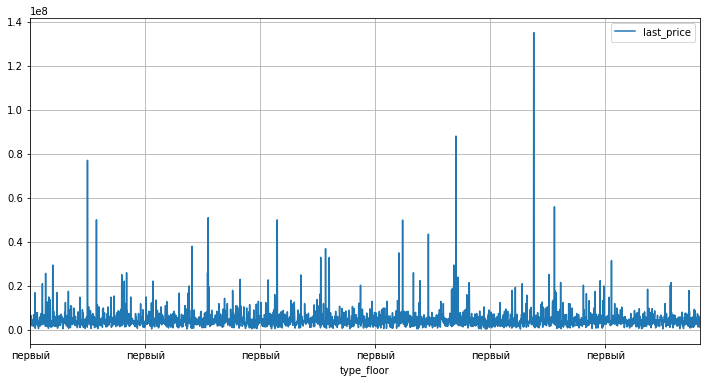

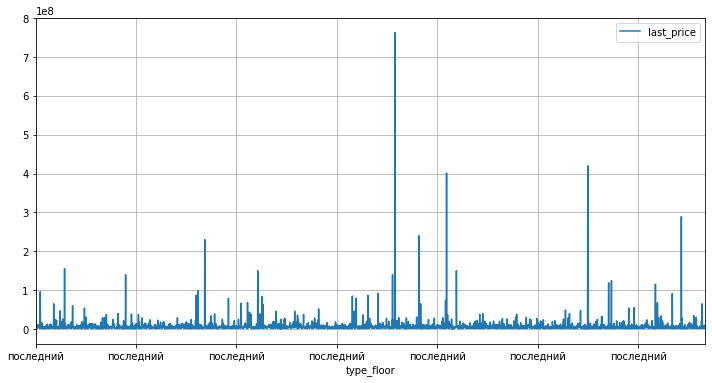

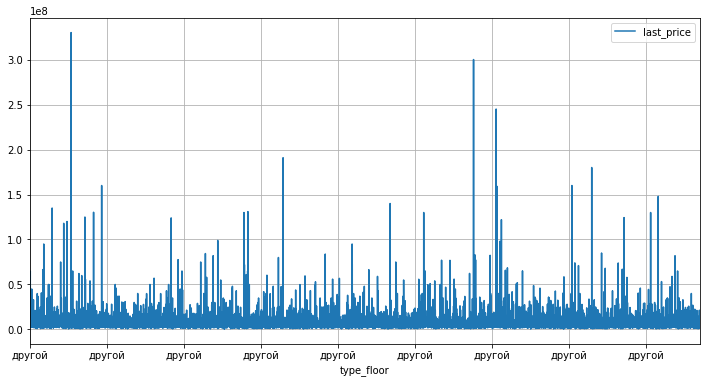

In [45]:
#зависимость цены от этажа (сделаем выборки для первого, последнего и других этажей):
first_floor = realty[realty['type_floor'] == 'первый']
last_floor = realty[realty['type_floor'] == 'последний']
another_floor = realty[realty['type_floor'] == 'другой']

#построим графики, чтобы визуализировать цены на различные группы этажности
first_floor.plot (x = 'type_floor', y = 'last_price', grid=True, figsize=(12, 6))
last_floor.plot (x = 'type_floor', y = 'last_price', grid=True, figsize=(12, 6))
another_floor.plot (x = 'type_floor', y = 'last_price', grid=True, figsize=(12, 6))

#построим сводную таблицу по ценам на разных типах этажей
good_price = (realty
    .query('last_price <= 11870000')
    .pivot_table(index = 'type_floor', values = 'last_price', aggfunc = 'median')
)
print(good_price)

Как влияет на цену то, на каком этаже находится квартира: первом, последнем или другом? Построим графики для каждого типа этажей по ранее сделанной выборке type_floor методом plot(), а также сводную таблицу (метод pivot_table) с расчетом медианы, чтобы разными способами рассмотреть соотношение цен. Видим, что самые низкие цены имеют квартиры, расположенные на первом этаже (медиана 3,8 млн). Чуть дороже квартиры на последнем этаже (медиана 4 млн) и самая высокая цена у квартир, расположенных на других этажах (медиана 4,5 млн).

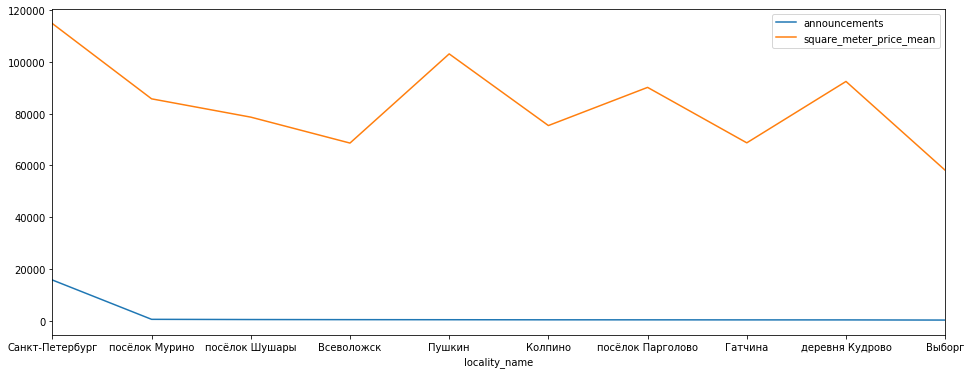

In [46]:
#сгруппируем населенные пункты по частоте объявлений
top_localities = realty['locality_name'].value_counts().to_dict()
top_localities

#посчтиаем с помощью сводных таблиц цену за квадратный метр
localities = realty.pivot_table(index = 'locality_name', values = 'total_images', aggfunc = 'count')

#дадим имя столбцу с количеством объявлений
localities.columns = ['announcements']

#счиитаем среднюю цену за квадратный метр
realty_price_mean = realty.pivot_table(index = 'locality_name', values = 'square_meter_price', aggfunc = 'mean')

#добавим столбец в таблицу
localities['square_meter_price_mean'] = realty_price_mean['square_meter_price']
#print(localities)

#отсортируем по убыванию, выведем топ-10
top_10 = localities.sort_values(by = 'announcements', ascending = False).head(10)

#построим график зависимости цены от местоположения
top_10.plot(figsize=(16, 6))

Выберем населенные пункты с наибольшим числом объявлений с помощью сводных таблиц. Посчитаем среднюю цену квадратного метра в этих населённых пунктах методом mean(), примененным к сводной таблице. Самая высокая стоимость жилья за квадратный метр из топ-10 получается в Санкт-Петербурге (114849р за кв.м), а самая низкая - в Выборге (58141р за кв.м).

На графике зависимсти цены от местоположения видим, что среди топ-10 самая дорогая цена за квадратный метр (после Санкт-Петербурга, по убыванию) в Пушкине, Кудрово и Парголово, а самая низкая (после Выборга, по возрастанию) - во Всеволожске, Гатчине, Колпино и Мурино.

-0.310652242859832


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


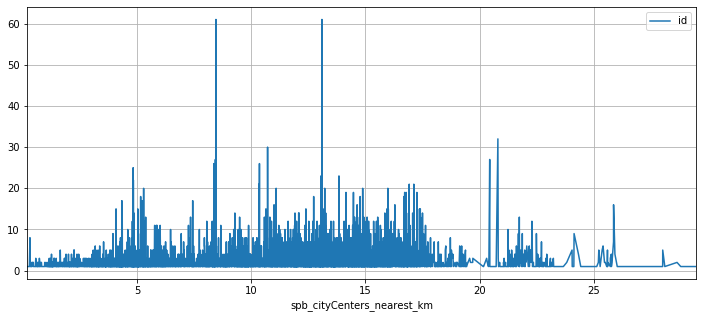

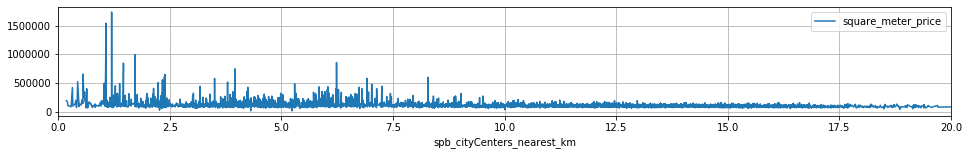

In [47]:
#выделим квартиры в Санкт-Петребурге
spb = realty[realty['locality_name'] == 'Санкт-Петербург']

#создадим столбец с расстоянием до центра в километрах, округлим до целых значений
spb['spb_cityCenters_nearest_km'] = spb['cityCenters_nearest'] / 1000

#вычислим коэффициент корреляции цены за квадратный метр от расстояния до центра Санкт-Петербурга
print(spb['spb_cityCenters_nearest_km'].corr(spb['square_meter_price']))

#построим график удаленности от центра на основе количества объявлений
(spb
    .pivot_table(index='spb_cityCenters_nearest_km', values='id', aggfunc = 'count')
    .plot(grid = True, figsize = (12, 5))
)

#и график, на котором видно, как в зависимости от километра меняется цена
(spb
    .pivot_table(index='spb_cityCenters_nearest_km', values='square_meter_price')
    .plot(grid = True, xlim = (0, 20), figsize = (16, 2))
)

Выделим квартиры в Санкт-Петербурге в отдельную таблицу.
Сгруппируем данные по каждому километру от центра с помощью графика. 
Выясним, какая область входит в центр. На графике мы видим, что со значения около 7 км количество объявлений резко падает. Эту область и будем считать центром. 

Создадим столбец с расстоянием до центра в километрах (разделим метры на 1000), округлим его до целых значений. Посчитаем среднюю цену для каждого километра. Вычислим коэффициент корреляции цены за квадратный метр от расстояния до центра Санкт-Петербурга: он составляет -0,31. Это означает, что с уменьшением расстояния от центра цена растет, однако, эта зависимость не очень велика.

Построим график, на котором видно, как в зависимости от километра меняется цена. 

Для большей наглядности можно построить еще один график, основанный на средней цене квадратного метра для каждого километра по мере удаления от центра.

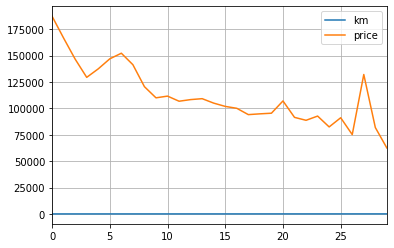

In [48]:
#сгруппируем данные Санкт-Петербурга по расстоянию от центра
spb_grouped_nearest = spb.sort_values(by='spb_cityCenters_nearest_km', ascending=False)

#print(spb_grouped_nearest)

#создадим таблицу на основе средней цены за каждый километр
km_price = [{'km': 1, 'price':187324.13031938203}, {'km': 2, 'price':166603.7555310588}, {'km': 3, 'price':146662.86005635076}, {'km': 4, 'price':129416.34461526225},{'km': 5, 'price':137475.49705463098}, {'km': 6, 'price':146979.232519001}, {'km': 7, 'price':152277.89351888947}, {'km': 8, 'price':141399.7314561327}, {'km': 9, 'price':120581.34983004532}, {'km': 10, 'price':110012.54968577878}, {'km': 11, 'price':111641.28718151394}, {'km': 12, 'price':106790.88388196044}, {'km': 13, 'price':108334.06939178094}, {'km': 14, 'price':109205.55449117885}, {'km': 15, 'price':104992.32890832839}, {'km': 16, 'price':101883.11601257576}, {'km': 17, 'price':100085.60172113718}, {'km': 18, 'price':94095.87235699527}, {'km': 19, 'price':94831.9531618852}, {'km': 20, 'price':95434.37729495653}, {'km': 21, 'price':107046.16604676687}, {'km': 22, 'price':91492.68814941763}, {'km': 23, 'price':88714.69697431341}, {'km': 24, 'price':92720.64157672766}, {'km': 25, 'price':82440.34391228852}, {'km': 26, 'price':91136.01851135204}, {'km': 27, 'price':75171.91104147625}, {'km': 28, 'price':132115.70945945947}, {'km': 29, 'price':81840.63872217937}, {'km': 30, 'price':62482.404228228006}]
km_price = pd.DataFrame(km_price)
#print(km_price)

#построим график зависимости средней цены каждого километра от удаленности от центра
km_price.plot(grid = True)

Сгруппируем данные Санкт-Петербурга по расстоянию от центра. 
Вычислим среднюю цену за квадратный метр для каждого километра от центра.
Создадим таблицу на основе полученных данных со столбцами: километр и цена (средняя за квадратный метр). 
Построим график зависимости средней цены каждого километра от удаленности от центра.
На этом графике тоже видим, что затяжной спад начинается примерно на расстоянии 7 км от центра. 

In [49]:
#вызовем метод describe()
#pd.options.display.float_format = '{:.2f}'.format
spb.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,airports_nearest,...,ponds_nearest,days_exposition,square_meter_price,year,month,weekday,living_total_area_ratio,kitchen_total_area_ratio,id,spb_cityCenters_nearest_km
count,15721.00,15721.00,15721.00,15721.00,15721.00,15721.00,14581.00,15721.00,14342.00,15636.00,...,7983.00,15721.00,15721.00,15721.00,15721.00,15721.00,14581.00,14342.00,15721.00,15721.00
mean,10.18,8062507.07,64.75,2.17,2.75,11.39,36.96,6.24,11.16,28046.19,...,520.21,171.16,114849.01,2017.35,6.42,2.56,0.57,0.19,11817.39,11.61
std,5.75,13013133.29,40.42,1.15,1.04,6.36,24.70,4.90,6.54,11557.06,...,280.26,211.41,52584.52,1.06,3.47,1.78,0.11,0.07,6797.89,4.83
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,...,13.00,1.00,111.83,2014.00,1.00,0.00,0.02,0.03,0.00,0.18
25%,6.00,4200000.00,42.00,1.00,2.60,5.00,19.90,3.00,7.20,18584.25,...,293.00,47.00,90909.09,2017.00,3.00,1.00,0.50,0.13,5911.00,8.37
50%,10.00,5500000.00,55.00,2.00,2.65,9.00,31.30,5.00,9.90,26757.50,...,503.00,95.00,104761.90,2017.00,6.00,2.00,0.57,0.17,11824.00,12.26
75%,14.00,8160000.00,74.60,3.00,2.75,16.00,44.00,8.00,12.50,36614.00,...,738.00,199.00,124438.90,2018.00,10.00,4.00,0.64,0.23,17644.00,14.94
max,50.00,763000000.00,900.00,19.00,100.00,52.00,409.70,33.00,112.00,54784.00,...,1337.00,1572.00,1907500.00,2019.00,12.00,6.00,1.00,0.79,23648.00,29.49


(15000000, 0)

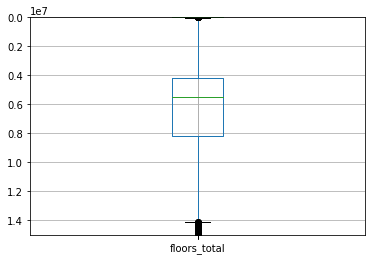

In [50]:
#постороим bоxplot для значений цены
boxplot = spb.boxplot(column = ['last_price'])
plt.ylim(15000000,0)

#для высоты потолков
boxplot = spb.boxplot(column = ['ceiling_height'])
plt.ylim(15000000,0)

#для времени продажи
boxplot = spb.boxplot(column = ['days_exposition'])
plt.ylim(15000000,0)

#и количества этажей
boxplot = spb.boxplot(column = ['floors_total'])
plt.ylim(15000000,0)

Посмотрим информацию по Санкт-Петербургу методом describe(), а также построим графики методом boxplot().

Посмотрим средние и медианные значения столбцов, содержащих информацию о цене, высоте потолков, времени продажи, количестве этажей и расстоянии до центра.

Цена квартиры в Санкт-Петербурге обычно колеблется от 4,2 млн до 8,16 млн. Медианное значение - 5,5 млн (по всем населенным пунктам - соответственно от 3,4 млн до 6,79 млн, медиана 4,65 млн). Верхнюю границу следует продлить до значения, равного 1,5 межквартильным размахам, т.е.до 13,5 млн, остальное нужно отфильтровать.

Медиана для высоты потолков составляет 2,65м, а в основном высота колеблется от 2,6 м до 2,75 м. Максимальный порог - 2,97 м, остальные значения можно отсечь.

Поскольку среднее время продажи почти вдвое больше медианы, значит - есть выбивающиеся значения. Cудя по полученной информации по нижнему и верхнему квартилям, продажа квартиры обычно занимает от 47 до 199 дней. Квартиры, которые проданы быстрее, чем за 47 дней - проданы быстро, а дольше, чем за 199 - уже долго. Однако, верхнюю границу следует продлить до значения, равного 1,5 межквартильным размахам, т.е.до 427 дней.

Количество этажей, как и во всех населенных пунктах в целом - чаще всего равно 9, верхний квартиль соответствует 16, нижний - 5. Среднее и медиана различаются несущественно, значит, значения не содержат многочисленных выбросов, но для большей точности всё же лучше отфильтровать их.

In [51]:
#создадим выборку, исключив слишком дорогие значения цены
spb_filtered_price = spb.query('last_price <= 13500000')

#и слишком высокие потолки
spb_filtered_ceiling_height = spb.query('ceiling_height <= 2.97')

#уберем выбивающиеся значения по времени
spb_filtered_days_exposition = spb.query('days_exposition <= 427')

#и по количеству этажей
spb_filtered_floors_total = spb.query('floors_total <= 40')

Отфильтруем выбивающиеся значения в столбцах last_price, ceiling_height, days_exposition и floors_total метдом query().

In [52]:
#вычислим цену квадратного метра в Санкт-Петербурге и добавим столбец в таблицу
spb['square_meter_price'] = spb['last_price'] / spb['total_area']
spb['square_meter_price']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0       120370.37
2        92785.71
3       408176.10
4       100000.00
7       110544.69
           ...   
23689   100566.57
23690   105769.23
23691   129903.98
23694    72490.85
23697   149511.40
Name: square_meter_price, Length: 15721, dtype: float64

Добавляем столбец с ценой квадратного метра в Санкт-Петербурге в таблицу

In [53]:
#посмотрим корреляцию значений для Санкт-Петербурга
pd.options.display.float_format = '{:.2f}'.format
spb.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,...,ponds_nearest,days_exposition,square_meter_price,year,month,weekday,living_total_area_ratio,kitchen_total_area_ratio,id,spb_cityCenters_nearest_km
total_images,1.00,0.10,0.10,0.08,0.00,0.02,0.09,0.04,-0.02,-0.01,...,-0.01,-0.05,0.12,0.15,0.00,-0.01,-0.01,-0.02,0.01,-0.01
last_price,0.10,1.00,0.66,0.37,0.07,-0.06,0.57,-0.00,-0.03,-0.00,...,-0.09,0.07,0.76,-0.04,0.00,0.01,0.00,-0.10,-0.00,-0.26
total_area,0.10,0.66,1.00,0.76,0.09,-0.11,0.94,-0.04,-0.06,-0.02,...,-0.11,0.13,0.29,-0.09,0.00,-0.00,0.14,-0.31,-0.01,-0.34
rooms,0.08,0.37,0.76,1.00,0.06,-0.26,0.84,-0.16,-0.14,-0.07,...,-0.07,0.11,0.04,-0.06,-0.01,-0.01,0.47,-0.58,-0.01,-0.29
ceiling_height,0.00,0.07,0.09,0.06,1.00,-0.04,0.08,-0.02,0.00,-0.00,...,-0.05,0.02,0.11,-0.00,-0.01,-0.01,0.01,0.01,0.01,-0.11
floors_total,0.02,-0.06,-0.11,-0.26,-0.04,1.00,-0.20,0.64,0.06,0.04,...,0.02,-0.04,0.01,0.02,0.01,0.02,-0.38,0.33,-0.00,0.36
living_area,0.09,0.57,0.94,0.84,0.08,-0.20,1.00,-0.11,-0.05,-0.03,...,-0.09,0.13,0.22,-0.08,-0.01,-0.01,0.41,-0.47,-0.01,-0.35
floor,0.04,-0.00,-0.04,-0.16,-0.02,0.64,-0.11,1.00,0.03,0.04,...,0.02,-0.03,0.05,0.01,0.01,0.02,-0.26,0.22,-0.01,0.23
studio,-0.02,-0.03,-0.06,-0.14,0.00,0.06,-0.05,0.03,1.00,-0.00,...,0.00,-0.02,0.01,0.01,0.01,0.00,0.09,nan,0.00,0.02
open_plan,-0.01,-0.00,-0.02,-0.07,-0.00,0.04,-0.03,0.04,-0.00,1.00,...,-0.01,-0.02,0.01,-0.02,0.03,0.01,0.07,nan,0.01,0.01


Методом corr() проверим зависимость между ценой квартиры и количеством квадратных метров. Коэффициент больше, чем по городу: 0,76 (по сравнению с 0,65).

Зависимость от числа комнат отличается несущественно: 0,37 по сравнению с 0,36 по городу.

Посмотрим на зависимость цены от дня, месяца и года размещения объявления. Коэффициент корреляции почти такой же, как по городу в целом: 0,1, 0, -0,04. А значит, зависимости цены от даты в центре тоже нет.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f37cf642310>,
      dtype=object)

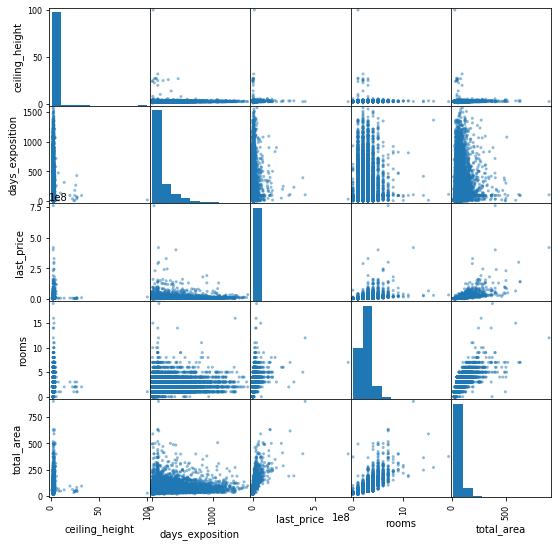

In [54]:
#выделим сегмент квартир в центре
spb_centre = spb.query('spb_cityCenters_nearest_km <= 7')
#print(spb_centre)

spb_good_centre = (spb
    .query('spb_cityCenters_nearest_km <= 7')
    .query('last_price <= 14100000')
    .query('ceiling_height <= 2.97')
    .query('days_exposition <= 427')
)
#print(spb_good_centre)

#построим матрицу рассеяния для центра по следующим параметрам:
#дни размещения, высота потолков, площадь квартир, цена, количество комнат
spb_centre_hist_multi = (spb
 .pivot_table(index='id', values=['days_exposition', 'ceiling_height', 'total_area', 'last_price', 'rooms'], aggfunc='mean')
)
pd.plotting.scatter_matrix(spb_centre_hist_multi, figsize = (9, 9))

Выделим сегмент квартир в центре - создадим отдельную таблицу с помощью метода query(). 

Построим матрицу рассеяния для интересующих параметров, рассмотрим каждый подробно.

Площадь квартир в центре, как и в городе, в основном колеблется от 25 до 70 кв.м. Однако в центре много квартир гораздо большей площади: до 100 и до 120 кв.м. 

Посмотрим гистограмму по цене. В городе она составляет, в большинстве случаев, от 3 до 5 млн, потом происходит плавный спад вплоть до 11 млн. В центре наблюдается охват более дорогих значений: от 3 до 9 млн, и спад продолжается до 14 млн.

Что касается числа комнат, то по городу много однокомнатных квартир, в центре - мало. Двухкомнатных в центре гораздо больше, чем по городу, и виден большой разрыв между однокомнатными и двухкомнатными. По городу такой большой разницы в количестве однокомнатных и двухкомнатных нет. В центре количество трехкомнатных квартир примерно равно количеству однокомнатных, а по городу трехкомнатных гораздо меньше. Четырехкомнатных тоже по центру больше, чем во всем городе.

На гистограмме по высоте потолков видим, что в городе многие квартиры имеют высоту 2,40 м, а основная масса лежит в диапазхоне 2,65 - 2,70м. В центре очень мало значений высоты 2,50м, основной пик леждит на значениях 2,65м и очень мало потолков высотой 2,70 - 2,80м. В городе мало трехметровых потолков, а в центре - напротив - много.

Время продажи в городе, в основном, занимает до 100 дней, а дальше наблюдаем на графике плавный спад. Также по городу много околонулевых значений (на графике по центру их нет). В центре значения гораздо более однородны, нет такого выраженного подъема и спада. Отдельные всплески наблюдаются на уровне 60, 90, 120 и 220 дней. Спад начинается от 380 дней.

In [55]:
#создадим столбец с уникальным идентификатором объявления, соответствующий номеру строки
spb_centre['id'] = spb_centre.reset_index().index

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
#вызовем метод describe()
pd.options.display.float_format = '{:.2f}'.format
spb_centre.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,airports_nearest,...,ponds_nearest,days_exposition,square_meter_price,year,month,weekday,living_total_area_ratio,kitchen_total_area_ratio,id,spb_cityCenters_nearest_km
count,3305.00,3305.00,3305.00,3305.00,3305.00,3305.00,3020.00,3305.00,2987.00,3299.00,...,2384.00,3305.00,3305.00,3305.00,3305.00,3305.00,3020.00,2987.00,3305.00,3305.00
mean,10.15,14967530.13,94.19,2.86,2.97,6.90,55.14,4.09,14.60,24553.01,...,466.78,224.84,144774.94,2017.17,6.42,2.50,0.58,0.17,1652.00,4.35
std,5.98,24669218.29,60.21,1.47,0.76,3.64,37.76,2.82,9.19,3833.82,...,274.36,259.56,93875.51,1.13,3.47,1.71,0.12,0.08,954.22,1.55
min,0.00,1600000.00,12.00,0.00,2.40,2.00,2.00,1.00,2.00,15359.00,...,22.00,3.00,15345.27,2014.00,1.00,0.00,0.02,0.03,0.00,0.18
25%,6.00,6700000.00,57.70,2.00,2.65,5.00,31.60,2.00,9.00,21864.00,...,223.00,71.00,99437.15,2017.00,3.00,1.00,0.51,0.12,826.00,3.40
50%,10.00,9300000.00,80.00,3.00,2.84,6.00,46.50,4.00,12.00,24202.00,...,457.00,97.00,123529.41,2017.00,6.00,3.00,0.60,0.15,1652.00,4.60
75%,15.00,14500000.00,110.60,4.00,3.17,8.00,67.00,5.00,17.00,26557.00,...,674.00,293.00,155976.68,2018.00,10.00,4.00,0.66,0.21,2478.00,5.48
max,50.00,763000000.00,631.20,19.00,32.00,25.00,409.00,25.00,107.00,39465.00,...,1293.00,1572.00,1907500.00,2019.00,12.00,6.00,0.98,0.64,3304.00,7.00


(15000000, 0)

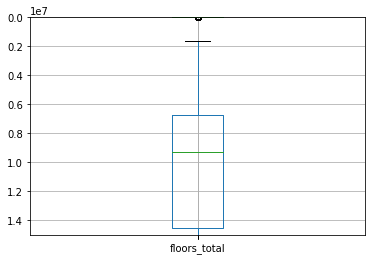

In [57]:
#постороим bоxplot для значений цены
boxplot = spb_centre.boxplot(column = ['last_price'])
plt.ylim(15000000,0)

#для высоты потолков
boxplot = spb_centre.boxplot(column = ['ceiling_height'])
plt.ylim(15000000,0)

#для времени продажи
boxplot = spb_centre.boxplot(column = ['days_exposition'])
plt.ylim(15000000,0)

#и количества этажей
boxplot = spb_centre.boxplot(column = ['floors_total'])
plt.ylim(15000000,0)

Применим к центру методы describe() и boхplot().

Что касается цен в центре, то здесь они значительно выше, чем по всему городу. Цены начинаются не с 1 млн.р, а с 3 млн р, в области 2 млн только единичные значения. Медианное значение цены в центре - 9,3 млн ( в отличие от 4,65 по городу), а колеблется она обычно (судя по верхнему и нижнему квартилям) от 6,7 до 14,5 млн (по городу - от 3,4 до 6,8 млн).

Соотношение высоты потолков в центре чуть смещается в сторону более высоких, чем по городу в целом. Чуть больше квартир имет потолки высотой 2,6 м и 3,17 м. Медианное значение здесь составляет 2,84 м, в отличие от 2,65 м по городу.

Поскольку среднее время продажи почти вдвое больше медианы, значит - есть выбивающиеся значения. Cудя по полученной информации по нижнему и верхнему квартилям, продажа квартиры обычно занимает более долгое время, чем по всему городу - от 71 до 293 дней. Медианное значение - 97 дней. Квартиры, которые проданы быстрее, чем за 71 день - проданы быстро, а дольше, чем за 293 - уже долго. Однако, верхнюю границу следует продлить до значения, равного 1,5 межквартильным размахам, т.е.до 626 дней.

Количество этажей, в отличие от города в целом, равно обычно 6. Верхний квартиль соответствует 8, нижний - 5. Таким образом, этажность зданий в центре более низкая и однородная, чем по городу в целом.

In [58]:
#посмотрим корреляцию для центра
pd.options.display.float_format = '{:.2f}'.format
spb_centre.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,...,ponds_nearest,days_exposition,square_meter_price,year,month,weekday,living_total_area_ratio,kitchen_total_area_ratio,id,spb_cityCenters_nearest_km
total_images,1.00,0.14,0.10,0.05,0.07,-0.05,0.08,-0.01,-0.03,-0.03,...,-0.01,-0.06,0.16,0.14,-0.01,0.00,-0.02,0.04,-0.00,-0.02
last_price,0.14,1.00,0.61,0.31,0.07,0.05,0.51,0.12,-0.02,0.00,...,-0.07,0.04,0.79,-0.04,-0.01,0.03,-0.01,-0.09,-0.02,-0.04
total_area,0.10,0.61,1.00,0.73,0.12,-0.01,0.94,0.11,-0.05,0.00,...,-0.07,0.10,0.24,-0.08,-0.02,0.01,0.16,-0.33,-0.03,-0.07
rooms,0.05,0.31,0.73,1.00,0.09,-0.17,0.82,-0.03,-0.11,-0.05,...,-0.05,0.10,-0.01,-0.06,-0.03,-0.01,0.42,-0.49,-0.03,-0.16
ceiling_height,0.07,0.07,0.12,0.09,1.00,-0.14,0.14,-0.07,0.02,0.00,...,-0.03,0.03,0.04,0.04,-0.02,-0.02,0.06,-0.05,0.01,-0.10
floors_total,-0.05,0.05,-0.01,-0.17,-0.14,1.00,-0.12,0.65,-0.01,0.00,...,0.06,0.02,0.13,-0.04,0.02,0.03,-0.34,0.17,0.03,0.34
living_area,0.08,0.51,0.94,0.82,0.14,-0.12,1.00,0.02,-0.04,-0.02,...,-0.06,0.10,0.17,-0.07,-0.02,-0.01,0.43,-0.46,-0.03,-0.13
floor,-0.01,0.12,0.11,-0.03,-0.07,0.65,0.02,1.00,-0.02,-0.01,...,0.03,0.03,0.13,-0.03,0.02,0.04,-0.20,0.05,-0.01,0.21
studio,-0.03,-0.02,-0.05,-0.11,0.02,-0.01,-0.04,-0.02,1.00,-0.00,...,0.02,-0.03,-0.00,0.01,0.01,0.01,0.06,nan,0.01,0.01
open_plan,-0.03,0.00,0.00,-0.05,0.00,0.00,-0.02,-0.01,-0.00,1.00,...,-0.00,-0.02,-0.00,-0.02,0.03,0.02,0.06,nan,0.01,0.01


Методом corr() проверим зависимость между ценой квартиры и количеством квадратных метров. Коэффициент чуть выше, чем по городу: 0, 79 по сравнению с 0,65. 

Зависимость от числа комнат, наоборот, чуть меньше: 0,31 по сравнению с 0,36 по городу.

Посмотрим на зависимость цены от дня недели, месяца и года размещения объявления. Коэффициент корреляции составляет, соответственно 0,03, -0,01, 0,14. Значит, зависимость цены от даты в центре ощущается практически так же, как по городу в целом, но это касается, в основном, только года размещения, и то не очень существенно.

,last_price
type_floor,
другой,5600000.00
первый,4861000.00
последний,5650000.00


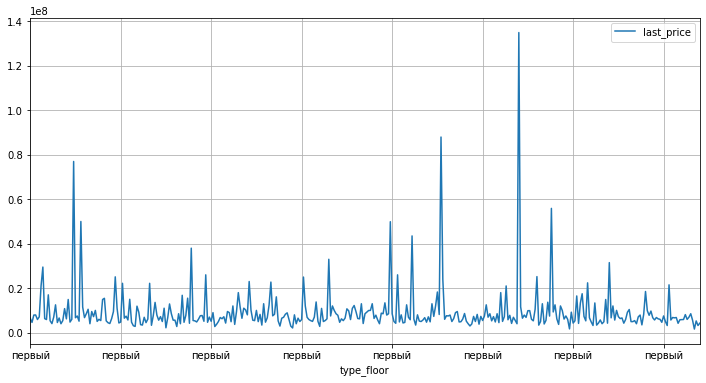

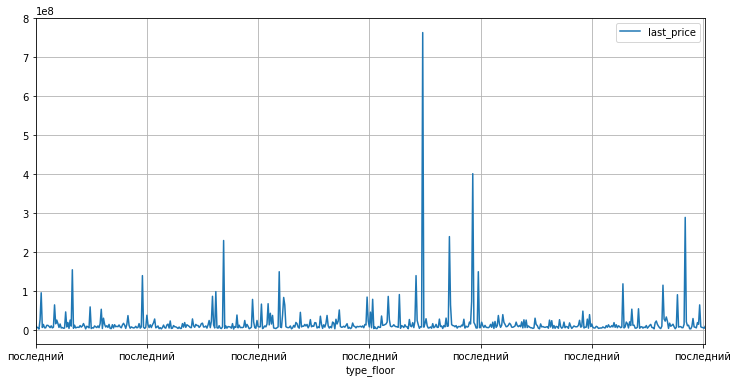

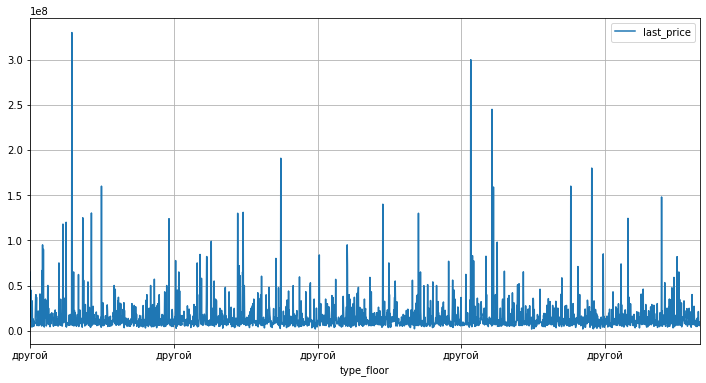

In [59]:
#зависимость цены от этажа (сделаем выборки для первого, последнего и других этажей):
first_floor = spb_centre[spb_centre['type_floor'] == 'первый']
last_floor = spb_centre[spb_centre['type_floor'] == 'последний']
another_floor  = spb_centre[spb_centre['type_floor'] == 'другой']

#построим графики, чтобы визуализировать цены на различные группы этажности
first_floor.plot (x = 'type_floor', y = 'last_price', grid=True, figsize=(12, 6))
last_floor.plot (x = 'type_floor', y = 'last_price', grid=True, figsize=(12, 6))
another_floor.plot (x = 'type_floor', y = 'last_price', grid=True, figsize=(12, 6))

#построим сводную таблицу по ценам на разных типах этажей
spb_good_centre = (spb.pivot_table(index = 'type_floor', values = 'last_price', aggfunc = 'median'))
spb_good_centre

Проверим зависимость цены квартиры от этажа (певого, последнего и других). Как и по городу в целом, квартиры в центре на первом этаже дешевле всего (средняя цена 4,8 млн). Но, в отличие от соотношения по городу, где цена последнего и остальных этажей различается существенно (4,3 млн и 4,8 млн соответственно), в центре эти показатели оказываются практически одинаковыми (5,6 млн). Значит, в центре на цену влияет только расположение квартиры на первом этаже.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


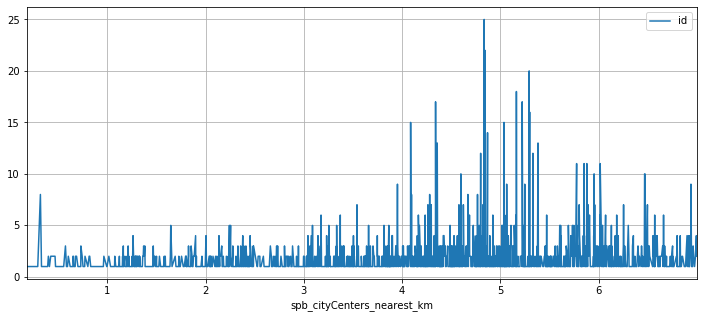

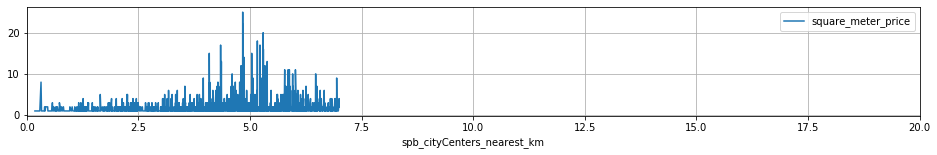

In [60]:
#создадим столбец с расстоянием до центра в километрах, округлим до целых значений
spb_centre['spb_cityCenters_nearest_km'] = spb_centre['cityCenters_nearest'] / 1000
#print(spb_centre['spb_cityCenters_nearest_km'].round())

#построим график удаленности от центра на основе количества объявлений
(spb_centre
    .pivot_table(index='spb_cityCenters_nearest_km', values='id', aggfunc = 'count')
    .plot(grid = True, figsize = (12, 5))
)

#и график, на котором видно, как в зависимости от километра меняется цена
(spb_centre
    .pivot_table(index='spb_cityCenters_nearest_km', values='square_meter_price', aggfunc = 'count')
    .plot(grid = True, xlim = (0, 20), figsize = (16, 2))
)

Больше всего квартир в центральном сегменте продается в радиусе 4-6 км от центра, здесь же наблюдается самая высокая цена за квадратный метр.

### Шаг 5. Общий вывод

Цена квартиры очень существенно зависит от удаленности от центра. В центральном сегменте цены значительно выше, чем по всему городу. Цена растет по мере уменьшения расстояния от центра, о чем говорит отрицательный коэффициент корреляции.  

От типа этажа цена зависит довольно значительно, причем по-разному в центре и по всему городу. Квартиры на первом этаже стоят дешевле как в центре, так и по территории города. Но по городу цена квартир, расположенных на последнем и на других этажах, различается существенно, а в центре она почти одинакова.  

Цена обусловлена также количеством квадратных метров, однако зависимость здесь прямая и примерно одинакова в городе и в центральном сегменте.

На цену влияет число комнат - как в городе в целом, так и в центре.

Совершенно не зависит стоимость квартиры от дня недели и месяца размещения объявления. Совсем небольшая зависимость прослеживается по отношению к году, но это ожидаемое следствие инфляции.